In [12]:
import numpy as np
import pandas as pd
from pathlib import Path
from natsort import natsorted
import matplotlib.pyplot as plt
import h5py
plt.style.use('./graph_preset.mplstyle')

### １．データの読み込み

In [13]:
run_dir = Path("../runs")
read_paths = natsorted(run_dir.glob("*.h5"))

for idx, read_path in enumerate(read_paths, start=0):
    run_name = Path(read_path).name   # e.g. 250526105004.h5
    print(f"{idx}: {run_name}")

0: 251027181533.h5
1: 251027181823.h5
2: 251027182111.h5
3: 251027182153.h5
4: 251118133117.h5
5: 251118134307.h5
6: 251118140128.h5
7: 251118140240.h5
8: 251118141016.h5


### ２．データの選択

In [15]:
index = 8

with h5py.File(read_paths[index], "r") as f: # read_paths[#] that you want to read
    print(f"--- Structure of {read_path} ---")

    def print_structure(name, obj):
        # データセットの場合は形状とデータ型も表示
        if isinstance(obj, h5py.Dataset):
            print(f"  {name} (Dataset) | Shape: {obj.shape}, Dtype: {obj.dtype}")
        # グループの場合はグループ名を表示
        elif isinstance(obj, h5py.Group):
            print(f"  {name} (Group)")

    f.visititems(print_structure)
    print("---------------------------------")

--- Structure of ..\runs\251118141016.h5 ---
  current_reduction (Group)
  logs (Group)
  logs/log (Dataset) | Shape: (800, 5), Dtype: float32
---------------------------------


In [16]:
df_data = dict()

def store_dataset(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"  Loading: {name} | Shape: {obj.shape}")
        df = pd.DataFrame(obj[:])
        df_data[name] = df

with h5py.File(read_paths[index], "r") as f:
    print(f"--- Loading all datasets from {read_paths[index]} ---")
    f.visititems(store_dataset)
    print("---------------------------------------------")

print("\n--- Dictionary Keys ---")
print(list(df_data.keys()))
print("-----------------------")

--- Loading all datasets from ..\runs\251118141016.h5 ---
  Loading: logs/log | Shape: (800, 5)
---------------------------------------------

--- Dictionary Keys ---
['logs/log']
-----------------------


In [18]:
if 'logs/log' in df_data:
    df_data['logs/log'].columns = ["rel_time", "com", "vel", "Ptot_sum", "P_tot_w"]

for name in list(df_data.keys())[:-1]:
    if name in df_data:
        df_data[name].columns = ["rel_time", "Iu", "Vu", "Ptot_sum", "Ptot_sum_w"]

In [19]:
df_data["logs/log"]

,rel_time,com,vel,Ptot_sum,P_tot_w
0,0.138990,0.0,0.098359,0.415779,0.416048
1,0.277990,0.0,0.098359,0.415784,0.413223
2,0.416990,0.0,0.101872,0.415749,0.415997
3,0.555990,0.0,0.098359,0.415678,0.413230
4,0.694990,0.0,0.101872,0.415838,0.416148
...,...,...,...,...,...
795,110.643990,0.0,0.098359,0.415721,0.415353
796,110.782990,0.0,0.101872,0.415737,0.415346
797,110.921989,0.0,0.098359,0.415720,0.415273
798,111.060989,0.0,0.101872,0.415686,0.415387


In [7]:
df_data["current_reduction/current_45"]

KeyError: 'current_reduction/current_45'

### ３．プロット

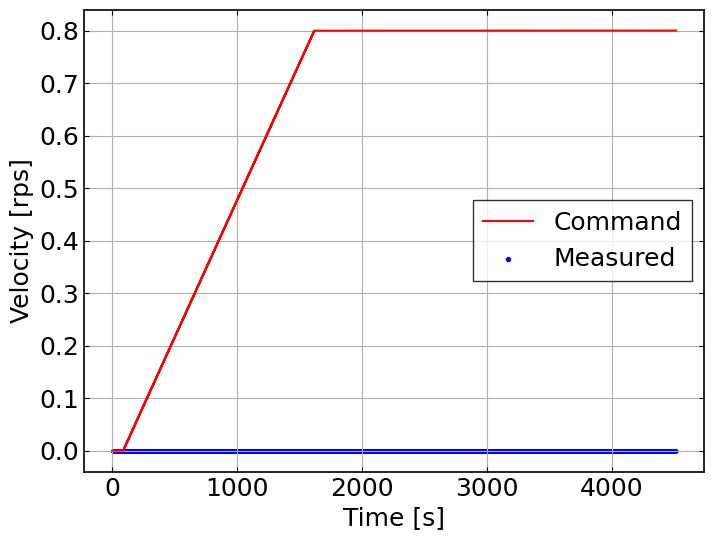

In [229]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(df_data["logs/log"]["rel_time"], df_data["logs/log"]["com"], label="Command", color="red")
ax.scatter(df_data["logs/log"]["rel_time"], df_data["logs/log"]["vel"], label="Measured", color="blue", s=2)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Velocity [rps]")

ax.grid()
ax.legend()

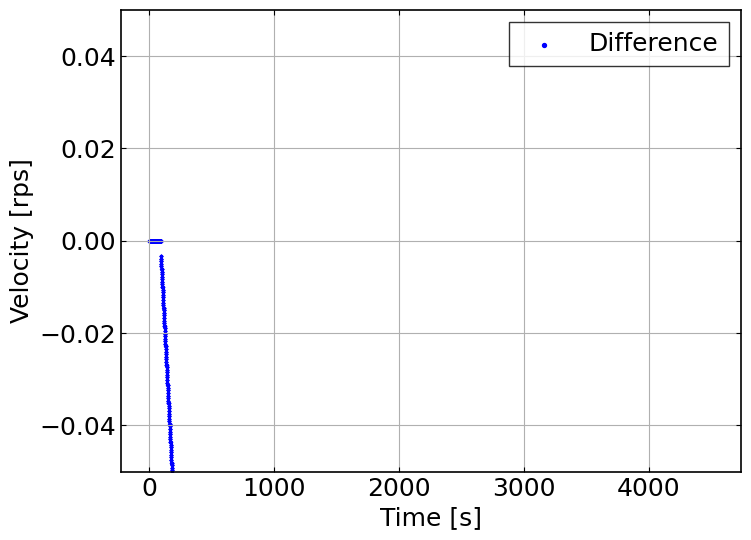

In [230]:
fig, ax = plt.subplots(figsize=(8, 6))
#ax.step(df_data["logs/log"]["rel_time"], df_data["logs/log"]["com"], label="Command", color="red")
ax.scatter(df_data["logs/log"]["rel_time"], df_data["logs/log"]["vel"]-df_data["logs/log"]["com"], label="Difference", color="blue", s=2)

ax.set_ylim(-0.05, 0.05)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Velocity [rps]")

ax.grid()
ax.legend()

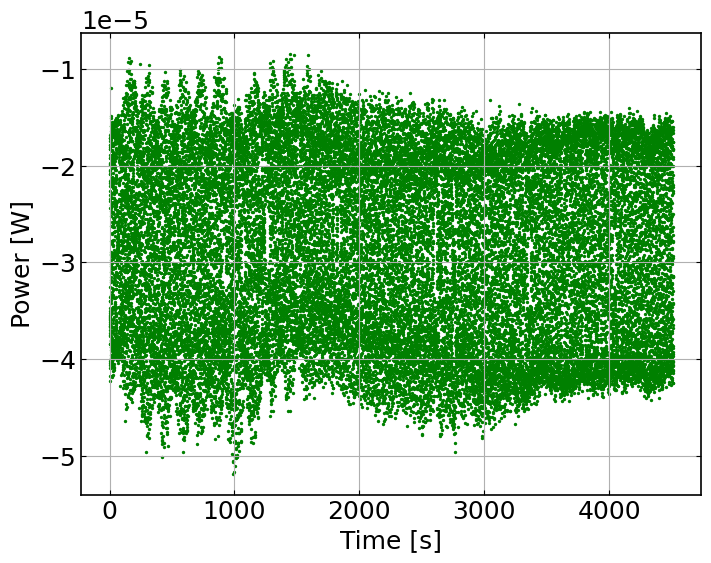

In [231]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_data["logs/log"]["rel_time"], df_data["logs/log"]["Ptot"], label="Pow.", color="g", s=2)
#ax.scatter(df_data["logs/log"]["rel_time"], df_data["logs/log"]["vel"], label="Vel.", color="blue", s=2)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Power [W]")

ax.grid()
#ax.legend()

KeyError: 'current_reduction/current_8'

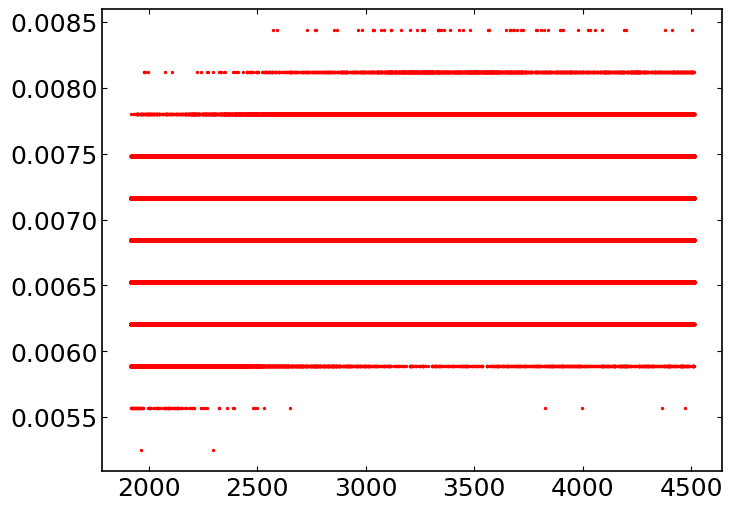

In [232]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_data["current_reduction/current_45"]["rel_time"][:], df_data["current_reduction/current_45"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_40"]["rel_time"][:], df_data["current_reduction/current_40"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_35"]["rel_time"][:], df_data["current_reduction/current_35"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_30"]["rel_time"][:], df_data["current_reduction/current_30"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_25"]["rel_time"][:], df_data["current_reduction/current_25"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_20"]["rel_time"][:], df_data["current_reduction/current_20"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_15"]["rel_time"][:], df_data["current_reduction/current_15"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_10"]["rel_time"][:], df_data["current_reduction/current_10"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_9"]["rel_time"][:], df_data["current_reduction/current_9"]["Iu"][:], label="Current (Iu)", color="red",s=2)
ax.scatter(df_data["current_reduction/current_8"]["rel_time"][:], df_data["current_reduction/current_8"]["Iu"][:], label="Current (Iu)", color="red",s=2)
#ax.plot(df_data["current_reduction/current_35"]["rel_time"][:], df_data["current_reduction/current_35"]["Iu"][:], label="Current (Iu)", color="red",)
#ax.plot(df_data["current_reduction/current_20"]["rel_time"][:1000], df_data["current_reduction/current_20"]["Vu"][:1000], label="Voltage (Vu)", color="blue",)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Current [A]")

ax.grid()
#ax.legend()

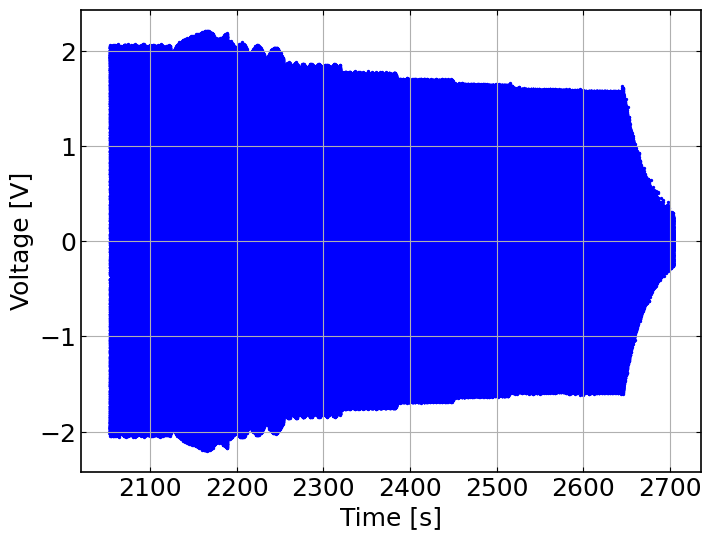

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_data["current_reduction/current_45"]["rel_time"][:], df_data["current_reduction/current_45"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_40"]["rel_time"][:], df_data["current_reduction/current_40"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_35"]["rel_time"][:], df_data["current_reduction/current_35"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_30"]["rel_time"][:], df_data["current_reduction/current_30"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_25"]["rel_time"][:], df_data["current_reduction/current_25"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_20"]["rel_time"][:], df_data["current_reduction/current_20"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_15"]["rel_time"][:], df_data["current_reduction/current_15"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_10"]["rel_time"][:], df_data["current_reduction/current_10"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_9"]["rel_time"][:], df_data["current_reduction/current_9"]["Vu"][:], label="Current (Iu)", color="b",s=2)
ax.scatter(df_data["current_reduction/current_8"]["rel_time"][:], df_data["current_reduction/current_8"]["Vu"][:], label="Current (Iu)", color="b",s=2)
#ax.plot(df_data["current_reduction/current_35"]["rel_time"][:], df_data["current_reduction/current_35"]["Iu"][:], label="Current (Iu)", color="red",)
#ax.plot(df_data["current_reduction/current_20"]["rel_time"][:1000], df_data["current_reduction/current_20"]["Vu"][:1000], label="Voltage (Vu)", color="blue",)

ax.set_xlabel("Time [s]")
ax.set_ylabel("Voltage [V]")

ax.grid()
#ax.legend()

KeyError: 'current_reduction/current_45'

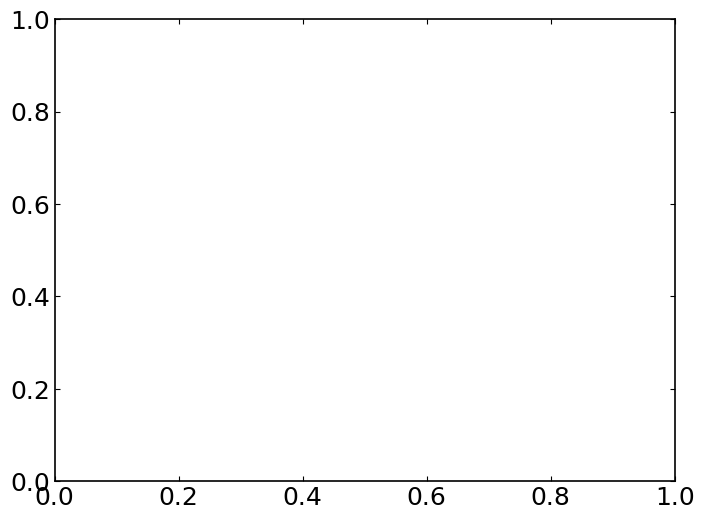

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_data["current_reduction/current_45"]["rel_time"][:100], df_data["current_reduction/current_45"]["Iu"][:100], label="Current (Iu)", color="red",)
ax.plot(df_data["current_reduction/current_45"]["rel_time"][:100], df_data["current_reduction/current_45"]["Vu"][:100], label="Voltage (Vu)", color="blue",)
#ax.plot(df_data["current_reduction/current_30"]["rel_time"][:], df_data["current_reduction/current_30"]["Iu"][:], label="Current (Iu)", color="red",)
#ax.plot(df_data["current_reduction/current_20"]["rel_time"][:1000], df_data["current_reduction/current_20"]["Vu"][:1000], label="Voltage (Vu)", color="blue",)

ax.set_ylim(-2.1, 2.1)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current[A], Voltage[V]")

ax.grid()
ax.legend()

KeyError: 'current_reduction/current_9'

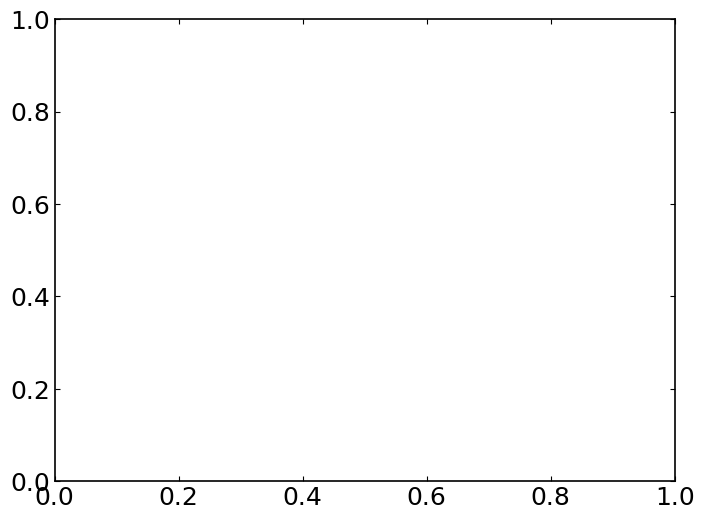

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df_data["current_reduction/current_9"]["rel_time"][:100], df_data["current_reduction/current_9"]["Iu"][:100], label="Current (Iu)", color="red",)
ax.plot(df_data["current_reduction/current_9"]["rel_time"][:100], df_data["current_reduction/current_9"]["Vu"][:100], label="Voltage (Vu)", color="blue",)
#ax.plot(df_data["current_reduction/current_30"]["rel_time"][:], df_data["current_reduction/current_30"]["Iu"][:], label="Current (Iu)", color="red",)
#ax.plot(df_data["current_reduction/current_20"]["rel_time"][:1000], df_data["current_reduction/current_20"]["Vu"][:1000], label="Voltage (Vu)", color="blue",)

ax.set_ylim(-2.1, 2.1)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current[A], Voltage[V]")

ax.grid()
ax.legend()

In [ ]:
df_data["current_reduction/current_9"]

KeyError: 'current_reduction/current_9'

In [ ]:
# mkdir
parent_dir = read_paths[index].parent
dir_name = read_paths[index].stem
output_dir = parent_dir / dir_name
output_dir.mkdir(parents=True, exist_ok=True)

In [233]:
# hdf2csv
for name, df in df_data.items():
    base_filename = name.split('/')[-1]
    csv_path = output_dir / (base_filename + ".csv")
    df.to_csv(csv_path, index=False)
    print(f"Data saved to {csv_path}")

Data saved to ..\runs\251017144427\current_10.csv
Data saved to ..\runs\251017144427\current_15.csv
Data saved to ..\runs\251017144427\current_20.csv
Data saved to ..\runs\251017144427\current_25.csv
Data saved to ..\runs\251017144427\current_30.csv
Data saved to ..\runs\251017144427\current_35.csv
Data saved to ..\runs\251017144427\current_40.csv
Data saved to ..\runs\251017144427\current_45.csv
Data saved to ..\runs\251017144427\current_9.csv
Data saved to ..\runs\251017144427\log.csv
